In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

# 9.30

In [9]:
m = 150
n = 80
alpha = 0.01
beta = 0.5

In [10]:
A = np.random.normal(1, 10, size=(m, n))

## (a) Gradient Method

In [11]:
def f(x):
  return -sum(np.log(1-np.matmul(A,x)))-sum(np.log(1+x))-sum(np.log(1-x))

In [12]:
eta = 1e-3
x_history = []
f_history = []
t_history = []
x = np.zeros((n,1))
for _ in range(500):
  x_history.append(x)
  f_history.append(f(x))
  gradient = A.T @ (1/(1-A@x)) - 1/(1+x) + 1/(1-x)
  if np.linalg.norm(gradient, ord=2) <= eta:
    break
  delta_x = - gradient
  t = 1
  while max(np.matmul(A,x + t*delta_x)) >= 1 or max(abs(x + t*delta_x)) >=1:
    t = beta*t
  while f(x+t*delta_x) >= f(x) + alpha*t*np.matmul(gradient.T,delta_x) :
      t = beta*t
  t_history.append(t)
  x = x + t*delta_x


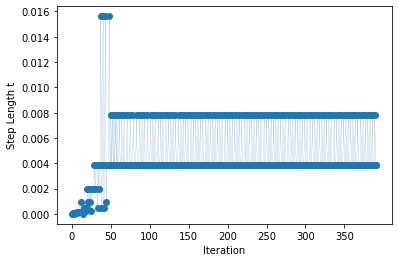

In [15]:
plt.plot(range(392),t_history, marker='o', linestyle='dashed', linewidth=0.2, markersize=6)
plt.xticks(range(0,392,50))
plt.xlabel("Iteration")
plt.ylabel("Step Length t")
plt.savefig("9.30.a.1.png",dpi=500)

Text(0, 0.5, 'f(x) - p*')

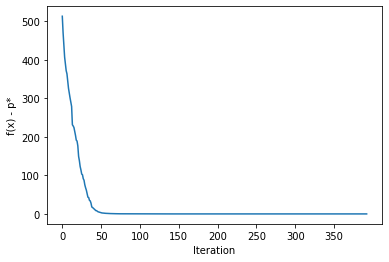

In [24]:
p_star = f_history[-1]
plt.plot(range(393),np.array(f_history)-float(p_star))
plt.xticks(range(0,392,50))
plt.xlabel("Iteration")
plt.ylabel("f(x) - p*")

## (b) Newton's Method

In [25]:
eta = 1e-8
x_history = []
f_history = []
t_history = []
x = np.zeros((n,1))
for _ in range(50):
  x_history.append(x)
  f_history.append(f(x))
  gradient = A.T @ (1/(1-A@x)) - 1/(1+x) + 1/(1-x)

  hessian = A.T @ np.diag((1/((1-A@x)**2)).T.tolist()[0]) @A 
  + np.diag(np.diag(1/(1+x)@(1+x).T +1/(1-x)@(1-x).T))

  delta_x = - np.linalg.inv(hessian) @ gradient

  if abs(gradient.T@delta_x) <= eta:
    break

  t = 1
  while max(np.matmul(A,x + t*delta_x)) >= 1 or max(abs(x + t*delta_x)) >=1:
    t = beta*t

  while f(x+t*delta_x) >= f(x) + alpha*t*gradient.T @ delta_x and t>=1e-20:
      t = beta*t
  t_history.append(t)
  x = x + t*delta_x


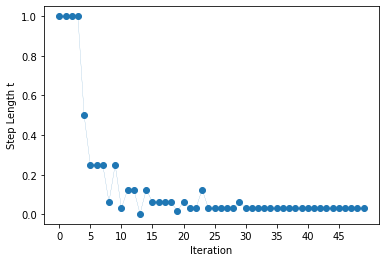

In [26]:
plt.plot(range(50),t_history, marker='o', linestyle='dashed', linewidth=0.2, markersize=6)
plt.xticks(range(0,50,5))
plt.xlabel("Iteration")
plt.ylabel("Step Length t")
plt.savefig("9.30.a.2.png",dpi=500)

Text(0, 0.5, 'f(x) - p*')

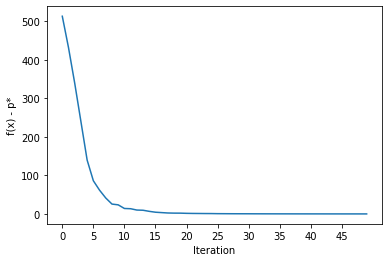

In [27]:
p_star = f_history[-1]
plt.plot(range(50),f_history-p_star)
plt.xticks(range(0,50,5))
plt.xlabel("Iteration")
plt.ylabel("f(x) - p*")

# 10.15

In [3]:
n = 100
p = 30
eta = 1e-8
alpha = 0.01
beta = 0.5

In [4]:
A = np.random.normal(5, 10, size=(p, n))
while np.linalg.matrix_rank(A) != p:
  A = np.random.normal(1, 10, size=(p, n))
x_0 = np.array([random.uniform(0,1) for i in range(n)])[np.newaxis].T

In [5]:
def f(x):
  return float(x.T @ np.log(x))

## (a) Standard Newton method

In [6]:
x = x_0
b = A @ x
x_history = []
w_history = []
f_history = []
t_history = []
for _ in range(100):
  x_history.append(x)
  f_history.append(f(x))
  gradient = 1 + np.log(x)
  hessian = np.diag((1/x).flatten())
  
  x_w = np.linalg.inv(np.block([[hessian, A.T],
    [A, np.zeros((p,p))]])) @ np.block([[-gradient],
    [np.zeros((p,1))]])
  delta_x = x_w[:n]
  w = x_w[n:]
  w_history.append(w)

  if abs(gradient.T @ delta_x) <= eta:
    print("-----converge-----")
    break

  t = 1
  while min(x + t*delta_x) <= 0:
    t = beta*t

  while f(x+t*delta_x) >= f(x) + alpha*t*gradient.T @ delta_x :
      t = beta*t
  t_history.append(t)
  x = x + t*delta_x

-----converge-----


-33.074353372849465


Text(0, 0.5, 'f(x) - p*')

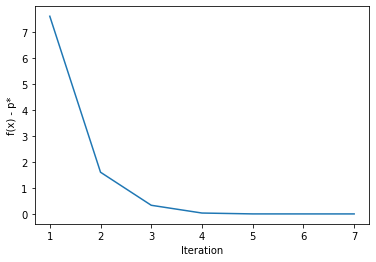

In [7]:
p_star = f_history[-1]
print(p_star)
plt.plot(range(1,8,1), [x-p_star for x in f_history])
plt.xticks(range(1,8,1))
plt.xlabel("Iteration")
plt.ylabel("f(x) - p*")

In [8]:
w_history[-1]

array([[-0.00609544],
       [ 0.00110149],
       [-0.00240211],
       [-0.00577771],
       [ 0.00742805],
       [ 0.01033087],
       [-0.00450386],
       [ 0.00769715],
       [ 0.00226439],
       [ 0.00296587],
       [ 0.00612498],
       [-0.00691957],
       [-0.00455807],
       [ 0.00769236],
       [-0.01103064],
       [-0.00868194],
       [-0.00138361],
       [-0.00046549],
       [-0.00871759],
       [-0.00399775],
       [-0.00287929],
       [-0.00200232],
       [ 0.00774598],
       [-0.00162215],
       [-0.00538928],
       [-0.01287795],
       [ 0.00749998],
       [-0.00084423],
       [-0.00348177],
       [-0.00774678]])

## (b) Infeasible start Newton method

### same start

In [9]:
x = x_0
b = A @ x
v = np.zeros((p,1))

x_history = []
v_history = []
f_history = []
t_history = []
for _ in range(100):
  x_history.append(x)
  v_history.append(v)
  f_history.append(f(x))
  gradient = 1 + np.log(x)
  hessian = np.diag((1/x).flatten())

  r = np.block([[gradient+A.T @ v], [A@x-b]])

  delta_x_v = - np.linalg.inv(np.block([[hessian, A.T],
    [A, np.zeros((p,p))]])) @ r
  delta_x = delta_x_v[:n]
  delta_v = delta_x_v[n:]

  if np.linalg.norm(r) <= eta:
    print("-----converge-----")
    break

  t = 1
  while min(x + t*delta_x) <= 0:
    t = beta*t


  new_r = np.block([[1+np.log(x+t*delta_x)+A.T@(v+t*delta_v)], 
                                 [A@(x+t*delta_x)-b]])
  while np.linalg.norm(new_r) >= (1-alpha*t)*np.linalg.norm(r) and t>=1e-30:
      t = beta*t
  t_history.append(t)
  x = x + t*delta_x
  v = v + t*delta_v

-----converge-----


-33.07435337284953


Text(0, 0.5, 'f(x) - p*')

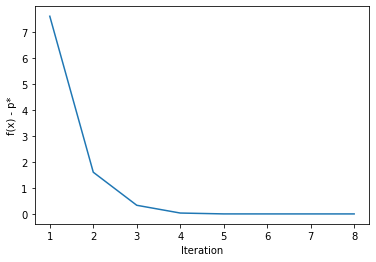

In [10]:
p_star = f_history[-1]
print(p_star)
plt.plot(range(1,9), [x-p_star for x in f_history])
plt.xticks(range(1,9,1))
plt.xlabel("Iteration")
plt.ylabel("f(x) - p*")

In [11]:
v_history[-1]

array([[-0.00609544],
       [ 0.00110149],
       [-0.00240211],
       [-0.00577771],
       [ 0.00742805],
       [ 0.01033087],
       [-0.00450386],
       [ 0.00769715],
       [ 0.00226439],
       [ 0.00296587],
       [ 0.00612498],
       [-0.00691957],
       [-0.00455807],
       [ 0.00769236],
       [-0.01103064],
       [-0.00868194],
       [-0.00138361],
       [-0.00046549],
       [-0.00871759],
       [-0.00399775],
       [-0.00287929],
       [-0.00200232],
       [ 0.00774598],
       [-0.00162215],
       [-0.00538928],
       [-0.01287795],
       [ 0.00749998],
       [-0.00084423],
       [-0.00348177],
       [-0.00774678]])

### new infeasible start

In [16]:
x = np.ones((n,1))
b = np.ones((p,1))
v = np.zeros((p,1))

x_history = []
v_history = []
f_history = []
t_history = []
for _ in range(100):
  x_history.append(x)
  v_history.append(v)
  f_history.append(f(x))
  gradient = 1 + np.log(x)
  hessian = np.diag((1/x).flatten())

  r = np.block([[gradient+A.T @ v], [A@x-b]])

  delta_x_v = - np.linalg.inv(np.block([[hessian, A.T],
    [A, np.zeros((p,p))]])) @ r
  delta_x = delta_x_v[:n]
  delta_v = delta_x_v[n:]

  if np.linalg.norm(r) <= eta:
    print("-----converge-----")
    break

  t = 1
  while min(x + t*delta_x) <= 0:
    t = beta*t


  new_r = np.block([[1+np.log(x+t*delta_x)+A.T@(v+t*delta_v)], 
                                 [A@(x+t*delta_x)-b]])
  while np.linalg.norm(new_r) >= (1-alpha*t)*np.linalg.norm(r) and t>=1e-30:
      t = beta*t
  t_history.append(t)
  x = x + t*delta_x
  v = v + t*delta_v

-----converge-----


-1.3915898325481781


Text(0, 0.5, 'f(x) - p*')

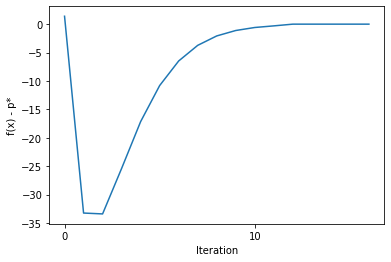

In [18]:
p_star = f_history[-1]
print(p_star)
plt.plot(range(17), [x-p_star for x in f_history])
plt.xticks(range(0,17,10))
plt.xlabel("Iteration")
plt.ylabel("f(x) - p*")

## (c) Dual Newton method

In [29]:
x = x_0
b = A @ x
v = np.zeros((p,1))

x_history = []
v_history = []
f_history = []
t_history = []
for _ in range(100):
  x_history.append(x)
  v_history.append(v)
  f = float(b.T @ v + sum(np.exp(-A.T@v-1)))
  f_history.append(f)
  gradient = b - A@np.exp(-A.T@v-1) 
  hessian = A @ np.diag(np.exp(-A.T@v-1).flatten()) @ A.T

  delta_v = - np.linalg.inv(hessian) @ gradient

  if abs(gradient.T @ delta_v) <= eta:
    print("-----converge-----")
    break

  t = 1
  while b.T@(v+t*delta_v)+sum(np.exp(-A.T@(v+t*delta_v)-1)) > f+alpha*t*gradient.T@delta_v:
    t = beta*t
  v = v + t*delta_v

-----converge-----


33.07435337284952


Text(0, 0.5, 'f(x) - p*')

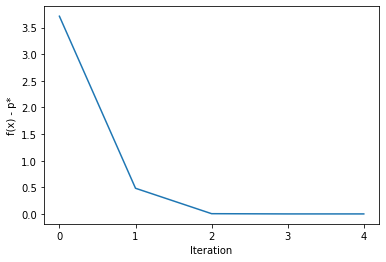

In [30]:
p_star = f_history[-1]
print(p_star)
plt.plot(range(5), [x-p_star for x in f_history])
plt.xticks(range(0,5,1))
plt.xlabel("Iteration")
plt.ylabel("f(x) - p*")

# 11.21

In [102]:
m = 80
n = 50
alpha = 0.01
beta = 0.5
mu = 20
NTTOL = 1e-8
TOL = 1e-4

In [193]:
A = np.random.rand(m,n)
l = np.random.rand(n,1)
x = l + np.random.rand(n,1)
x_0 = x
u = x + np.random.rand(n,1)
b = A @ x 
s = float(1.1*max(np.block([[max(b)], [max(1/b)]])))
t = 1

In [194]:
def f(x,t=t,s=s,l=l,u=u,b=b):
  return float(t*s - sum(np.log(u-x)) - sum(np.log(x-l)) - sum(np.log(s-b)) - sum(np.log(s*b-1)))

In [195]:
def newton_method(t, s, x, b, A=A, l=l, u=u):
  for k in range(500):
    obj = f(x,t)
    gradient = np.block([[t-sum(1./(s-b))-sum(b/(s*b-1))],
    [1/(u-x)-1/(x-l)+A.T@(1/(s-b)-s/(s*b-1))]])
    hessian = np.block([[sum((s-b)**(-2)+(b/(s*b-1))**(-2)),  
                          (-(s-b)**(-2) + (s*b-1)**(-2)).T@A],
                        [A.T@(-(np.ones((m,1))*s-b)**(-2) + (s*b-1)**(-2)),  
                          np.diag((u-x).flatten()**(-2)+(x-l).flatten()**(-2))+
                         A.T@(np.diag((s-b).flatten()**(-2)+
                                      (s/(s*b-1)).flatten()**(-2)))@A]])
    delta_t_s = - np.linalg.inv(hessian) @ gradient
    if abs(gradient.T @ delta_t_s)  <= NTTOL:
      print("-----Newton method converge-----")
      return(s,x,b)
    delta_s = delta_t_s[0]
    delta_x = delta_t_s[1:]
    delta_b = A@delta_x

    t_newton = 1
    s_new = s+t_newton*delta_s
    x_new = x+t_newton*delta_x
    b_new = b+t_newton*delta_b
    while min(np.block([[np.ones((m,1))*s_new-b_new],
                        [np.ones((m,1))*s_new -1/b_new],
                        [b_new],
                        [u-x_new],
                        [x_new - l]])) <= 0 and t_newton > 1e-20:
      t_newton = beta * t_newton

    s_new = s+t_newton*delta_s
    x_new = x+t_newton*delta_x
    b_new = b+t_newton*delta_b
  
    obj_new = f(x_new,t)
    while obj_new  >= obj+ t_newton*alpha*gradient.T @ delta_t_s and 
    t_newton > 1e-20:
      t_newton = beta * t_newton


    s = s+t_newton*delta_s
    x = x+t_newton*delta_x
    b = A@x
  return(s,x,b)

In [196]:
def barrier_method(t=t, x=x, A=A, l=l, u=u, b=b, s=s):
  for _ in range(100):
    if (3*m+2*n)/t < TOL:
      print("-----barrier method converge-----")
      return x
    t = mu * t
    s,x,b = newton_method(t,s,x,b)
  return x              

In [197]:
x = barrier_method()

-----barrier method converge-----


In [205]:
print(np.linalg.norm(A@x-np.ones((m,1))),np.linalg.norm(A@x_0-np.ones((m,1))))

201.99509706886252 202.63262643045854
